In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\Pc\Downloads\archive (7)\NSEI 2015-2023.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,101900
1,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,118200
2,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,172800
3,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,164100
4,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,143800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2213 non-null   object 
 1   Open    2213 non-null   float64
 2   High    2213 non-null   float64
 3   Low     2213 non-null   float64
 4   Close   2213 non-null   float64
 5   Volume  2213 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 103.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,2213.000000,2213.000000,2213.000000,2213.000000,2.213000e+03
mean,12405.978426,12463.024263,12326.337898,12396.524227,3.232975e+05
std,3861.464460,3873.947399,3844.778100,3861.815745,2.020718e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,0.000000e+00
25%,9026.750000,9099.049805,8912.400391,8981.450195,1.892000e+05
50%,11079.799805,11141.750000,11010.950195,11075.900391,2.561000e+05
75%,16270.049805,16338.750000,16172.599609,16258.250000,3.968000e+05
max,21737.650391,21801.449219,21678.000000,21778.699219,1.811000e+06


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [11]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Handle missing values
df = df.dropna()  # or fillna(method='ffill') if time series

In [28]:
df.index



DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2213, freq=None)

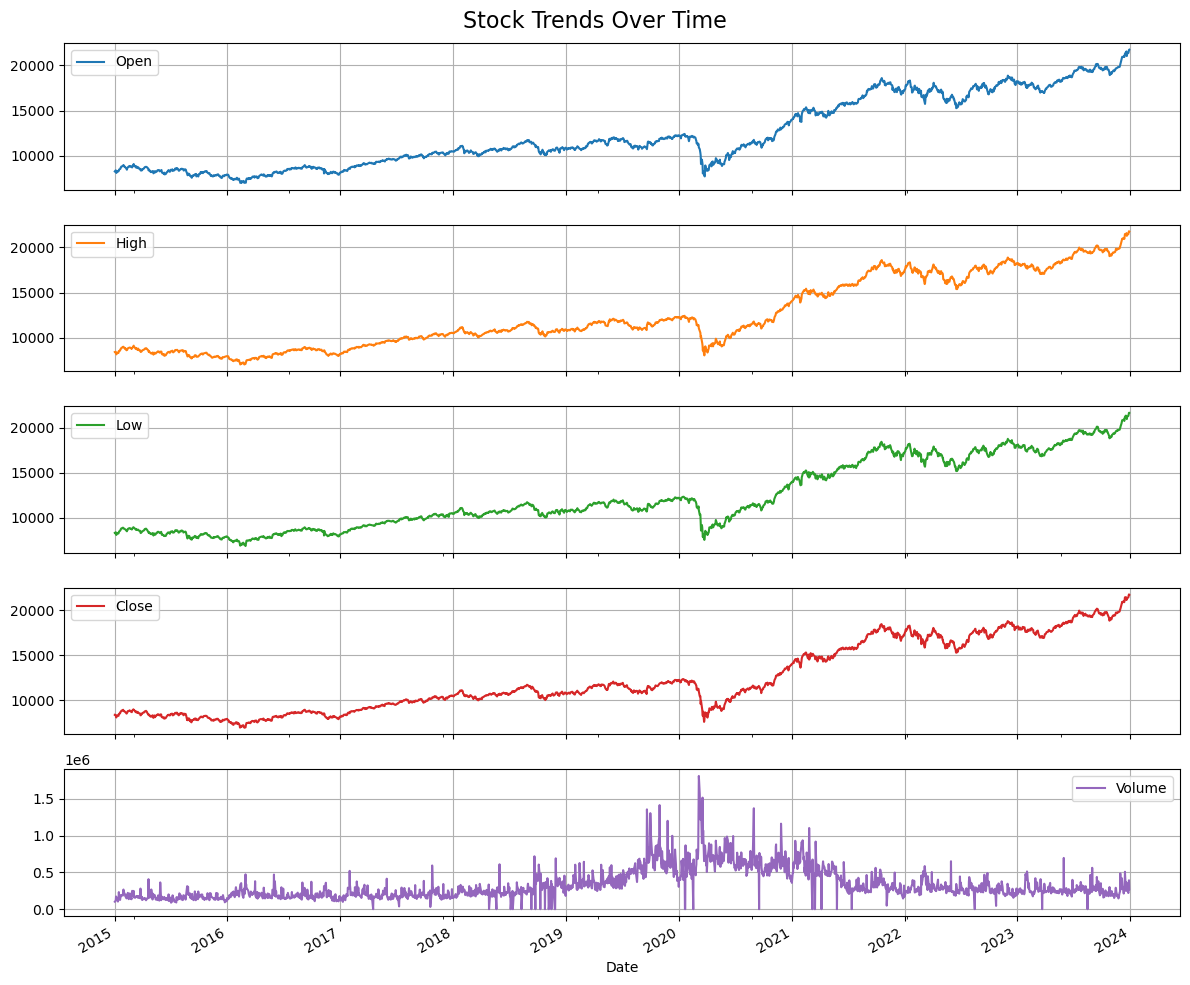

In [35]:
df[['Open','High','Low','Close','Volume']].plot(subplots=True, figsize=(12,10), grid=True)
plt.suptitle('Stock Trends Over Time', fontsize=16)
plt.tight_layout()
plt.show()


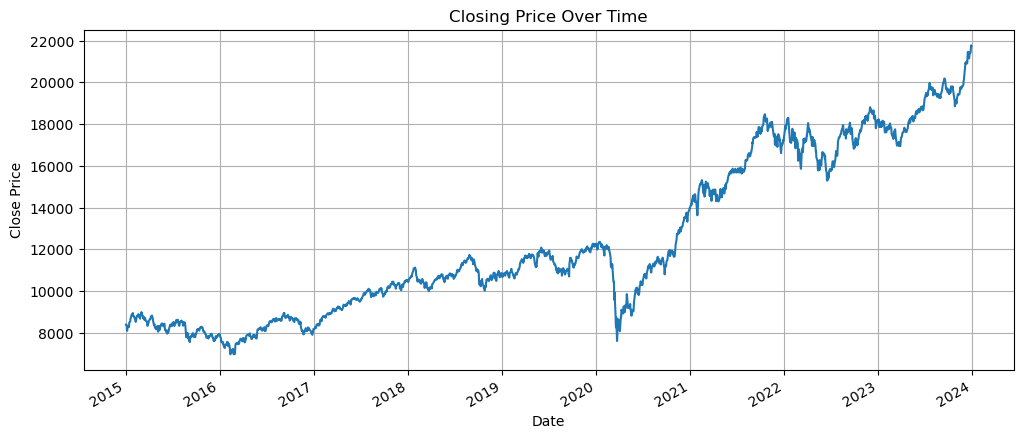

In [29]:
df['Close'].plot(figsize=(12,5))
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


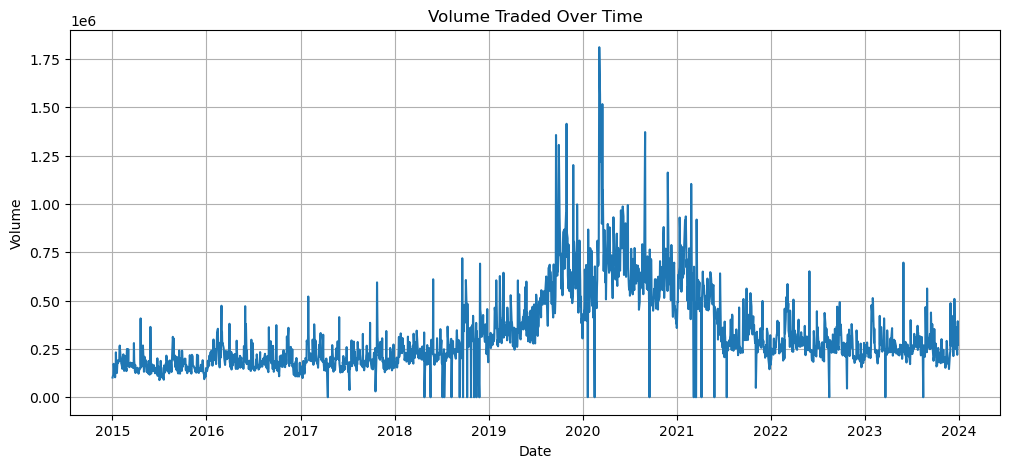

In [30]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Volume'])
plt.title("Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


In [32]:
df_corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(df_corr)



            Open      High       Low     Close    Volume
Open    1.000000  0.999857  0.999806  0.999656  0.081572
High    0.999857  1.000000  0.999741  0.999837  0.085649
Low     0.999806  0.999741  1.000000  0.999838  0.075659
Close   0.999656  0.999837  0.999838  1.000000  0.080818
Volume  0.081572  0.085649  0.075659  0.080818  1.000000


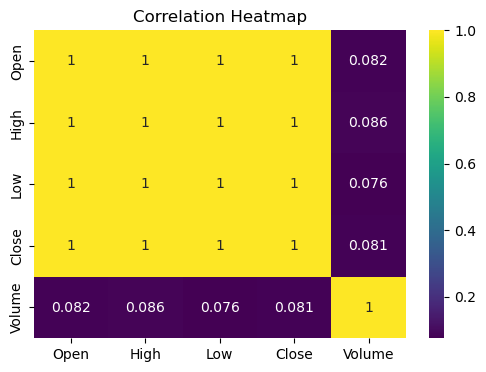

In [21]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(df_corr, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()


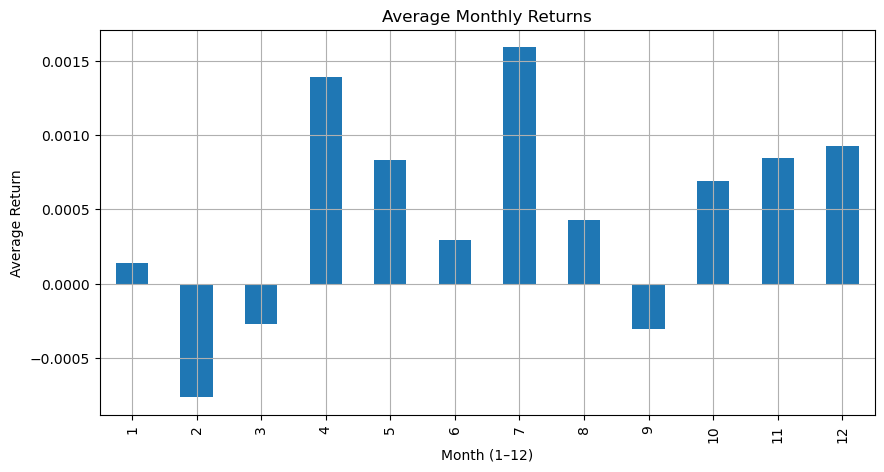

In [33]:
df['Returns'] = df['Close'].pct_change()
df['Month'] = df.index.month   # using DatetimeIndex

monthly_returns = df.groupby('Month')['Returns'].mean()

monthly_returns.plot(kind='bar', figsize=(10,5))
plt.title("Average Monthly Returns")
plt.xlabel("Month (1–12)")
plt.ylabel("Average Return")
plt.grid(True)
plt.show()


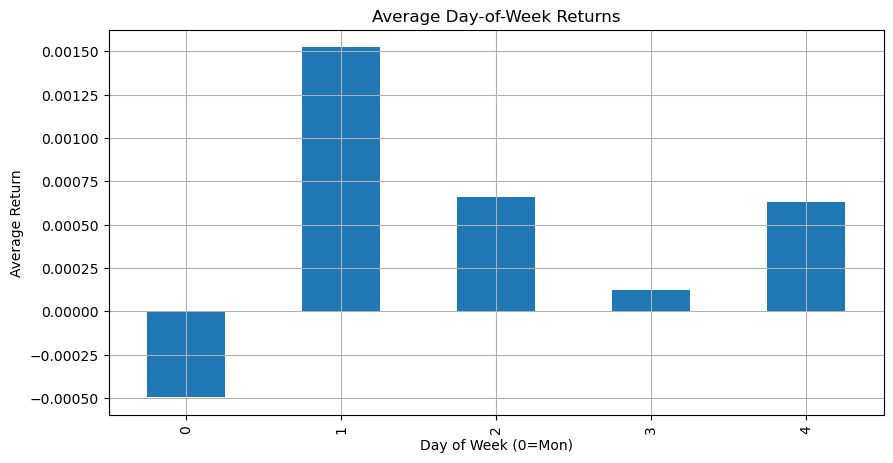

In [34]:
df['DayOfWeek'] = df.index.dayofweek   # 0=Mon ... 4=Fri for stock data

dow_returns = df.groupby('DayOfWeek')['Returns'].mean()

dow_returns.plot(kind='bar', figsize=(10,5))
plt.title("Average Day-of-Week Returns")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Average Return")
plt.grid(True)
plt.show()


In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Pc\Downloads\archive (7)\NSEI 2015-2023.csv")


In [4]:
df['Returns'] = df['Close'].pct_change()


In [5]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()


In [6]:
window = 20

df['BB_Middle'] = df['Close'].rolling(window=window).mean()
df['BB_STD'] = df['Close'].rolling(window=window).std()

df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_STD']
df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_STD']


In [7]:
n = 10
df['ROC'] = df['Close'].pct_change(periods=n) * 100


In [8]:
df['Volatility_20'] = df['Returns'].rolling(window=20).std()


In [9]:
period = 14

delta = df['Close'].diff()

gain = delta.where(delta > 0, 0.0)
loss = -delta.where(delta < 0, 0.0)

avg_gain = gain.rolling(window=period).mean()
avg_loss = loss.rolling(window=period).mean()

rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))


In [10]:
df.tail()


,Date,Open,High,Low,Close,Volume,Returns,MA20,MA50,BB_Middle,BB_STD,BB_Upper,BB_Lower,ROC,Volatility_20,RSI_14
2208,2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,284700,0.004439,20831.387500,20020.751992,20831.387500,523.171997,21877.731494,19785.043506,1.812164,0.007264,70.719263
2209,2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,219500,0.004307,20913.720020,20053.351992,20913.720020,479.156503,21872.033026,19955.407013,2.115768,0.007197,69.251046
2210,2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,256500,0.009953,21001.972559,20090.566992,21001.972559,441.705114,21885.382788,20118.562330,3.579524,0.007318,71.683535
2211,2023-12-28,21715.000000,21801.449219,21678.000000,21778.699219,393100,0.005724,21086.077539,20131.119961,21086.077539,419.843074,21925.763687,20246.391391,4.073093,0.007185,75.204670
2212,2023-12-29,21737.650391,21770.300781,21676.900391,21731.400391,270900,-0.002172,21165.990039,20171.112969,21165.990039,379.039451,21924.068942,20407.911137,2.590327,0.007305,72.152521


In [13]:
df['Target'] = df['Close'].shift(-1)
df[['Close', 'Target']].tail(10)


,Close,Target
2203,21456.650391,21418.650391
2204,21418.650391,21453.099609
2205,21453.099609,21150.150391
2206,21150.150391,21255.050781
2207,21255.050781,21349.400391
2208,21349.400391,21441.349609
2209,21441.349609,21654.750000
2210,21654.750000,21778.699219
2211,21778.699219,21731.400391
2212,21731.400391,NaN


In [29]:
# 1) Create UP/DOWN target (1 = UP, 0 = DOWN)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# 2) Drop rows with NaN (last row becomes NaN after shift)
df = df.dropna()



In [30]:
features = ['Open','High','Low','Close','Volume',
            'MA20','MA50','Returns','ROC',
            'Volatility_20','RSI_14']

X = df[features]
y = df['Target']



In [31]:
print(y.unique())
print(y.value_counts())



[0 1]
Target
1    1165
0     999
Name: count, dtype: int64


In [18]:
data = pd.concat([X, y], axis=1)
data = data.dropna()

X = data[features]
y = data['Target']


In [32]:
train_size = int(len(df) * 0.8)

X_train = X.iloc[:train_size]
X_test  = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]



In [33]:
print("Train labels:", y_train.unique())
print("Test labels:", y_test.unique())


Train labels: [0 1]
Test labels: [1 0]


In [34]:
X_train.head()



,Open,High,Low,Close,Volume,MA20,MA50,Returns,ROC,Volatility_20,RSI_14
49,8689.099609,8742.549805,8630.799805,8723.299805,177000,8799.122412,8669.166973,0.010442,-2.606416,0.009467,48.128324
50,8742.900391,8747.250000,8664.000000,8685.900391,156400,8792.949951,8674.975977,-0.004287,-3.449766,0.009503,46.194163
51,8749.450195,8788.200195,8614.650391,8634.650391,163500,8781.227490,8680.100977,-0.005900,-3.227740,0.009403,47.626889
52,8627.900391,8627.900391,8553.000000,8570.900391,174600,8765.007520,8688.971982,-0.007383,-4.104496,0.009441,35.435297
53,8591.549805,8608.349609,8540.549805,8550.900391,150700,8750.872559,8697.947988,-0.002333,-2.350754,0.009365,26.054580


In [35]:
X_train.tail()


,Open,High,Low,Close,Volume,MA20,MA50,Returns,ROC,Volatility_20,RSI_14
1775,17094.949219,17291.750000,17091.150391,17222.750000,290300,16712.917578,17210.160000,-0.001328,5.367890,0.017764,62.343694
1776,17289.000000,17294.900391,17076.550781,17153.000000,237100,16717.405078,17192.105000,-0.004050,3.363079,0.017787,66.487430
1777,17181.849609,17235.099609,17003.900391,17222.000000,253200,16766.107568,17172.298008,0.004023,3.557034,0.013703,77.852659
1778,17297.199219,17343.650391,17235.699219,17325.300781,235100,16799.452588,17153.648008,0.005998,2.690960,0.012696,77.417563
1779,17468.150391,17522.500000,17387.199219,17498.250000,505000,16834.670068,17138.498008,0.009982,5.012603,0.012749,75.810383


In [23]:
print("Train start:", X_train.index[0])
print("Train end:", X_train.index[-1])


Train start: 49
Train end: 1818


In [24]:
X_test.head()


,Open,High,Low,Close,Volume,MA20,MA50,BB_Upper,BB_Lower,ROC,Returns,Volatility_20,RSI_14
1819,16527.900391,16695.500000,16506.150391,16661.400391,251400,16255.342529,16918.038106,16920.932917,15589.752142,5.170339,0.018893,0.014924,57.752114
1820,16578.449219,16690.750000,16521.900391,16584.550781,651600,16231.115088,16910.222129,16800.276667,15661.953509,2.000400,-0.004612,0.014943,57.669368
1821,16594.400391,16649.199219,16438.849609,16522.750000,249600,16223.372608,16894.936113,16770.757176,15675.988039,1.739193,-0.003726,0.014074,64.741673
1822,16481.650391,16646.400391,16443.050781,16628.000000,236000,16220.640088,16885.144121,16758.839772,15682.440404,5.177930,0.006370,0.014154,66.892327
1823,16761.650391,16793.849609,16567.900391,16584.300781,245500,16229.292627,16870.520137,16785.652867,15672.932387,1.955905,-0.002628,0.013652,64.916390


In [25]:
X_test.tail()


,Open,High,Low,Close,Volume,MA20,MA50,BB_Upper,BB_Lower,ROC,Returns,Volatility_20,RSI_14
2207,21033.949219,21288.349609,20976.800781,21255.050781,277500,20754.017481,19987.560977,21865.872138,19642.162823,1.693210,0.004960,0.007324,75.659666
2208,21295.849609,21390.500000,21232.449219,21349.400391,284700,20831.387500,20020.751992,21877.731494,19785.043506,1.812164,0.004439,0.007264,70.719263
2209,21365.199219,21477.150391,21329.449219,21441.349609,219500,20913.720020,20053.351992,21872.033026,19955.407013,2.115768,0.004307,0.007197,69.251046
2210,21497.650391,21675.750000,21495.800781,21654.750000,256500,21001.972559,20090.566992,21885.382788,20118.562330,3.579524,0.009953,0.007318,71.683535
2211,21715.000000,21801.449219,21678.000000,21778.699219,393100,21086.077539,20131.119961,21925.763687,20246.391391,4.073093,0.005724,0.007185,75.204670


In [26]:
y_train.value_counts()
y_test.value_counts()


Target
17624.050781    2
21731.400391    1
16584.550781    1
16522.750000    1
16628.000000    1
               ..
15832.049805    1
15850.200195    1
15799.099609    1
15780.250000    1
20937.699219    1
Name: count, Length: 392, dtype: int64

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.47575057736720555
[[131  67]
 [160  75]]
              precision    recall  f1-score   support

           0       0.45      0.66      0.54       198
           1       0.53      0.32      0.40       235

    accuracy                           0.48       433
   macro avg       0.49      0.49      0.47       433
weighted avg       0.49      0.48      0.46       433



In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

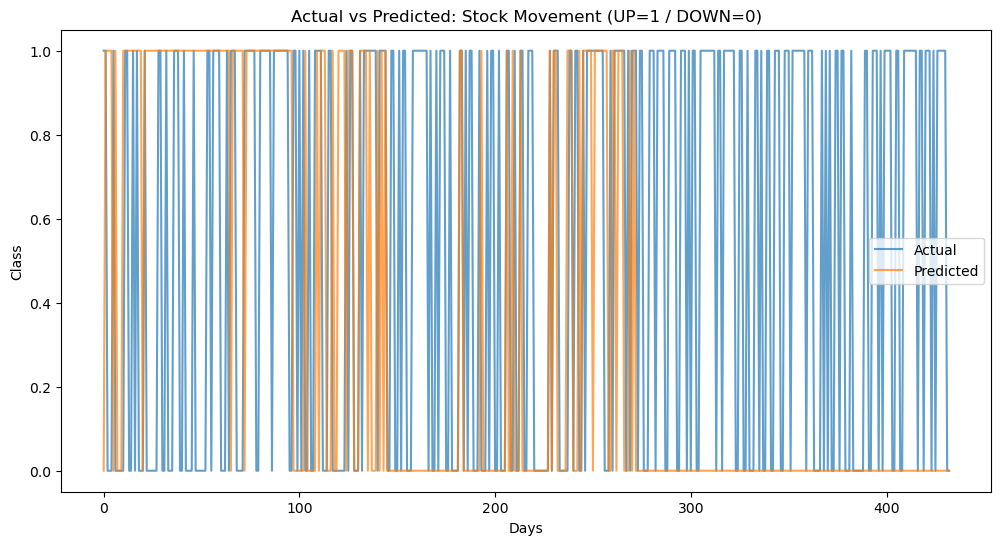

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.title("Actual vs Predicted: Stock Movement (UP=1 / DOWN=0)")
plt.xlabel("Days")
plt.ylabel("Class")
plt.legend()
plt.show()


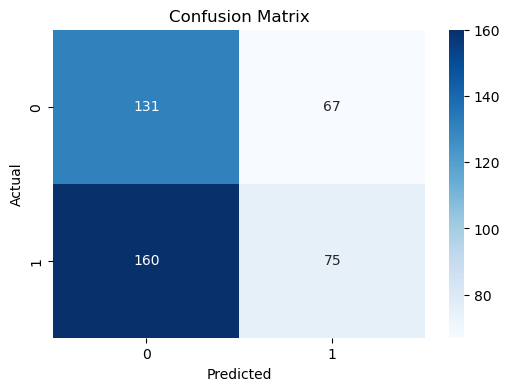

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


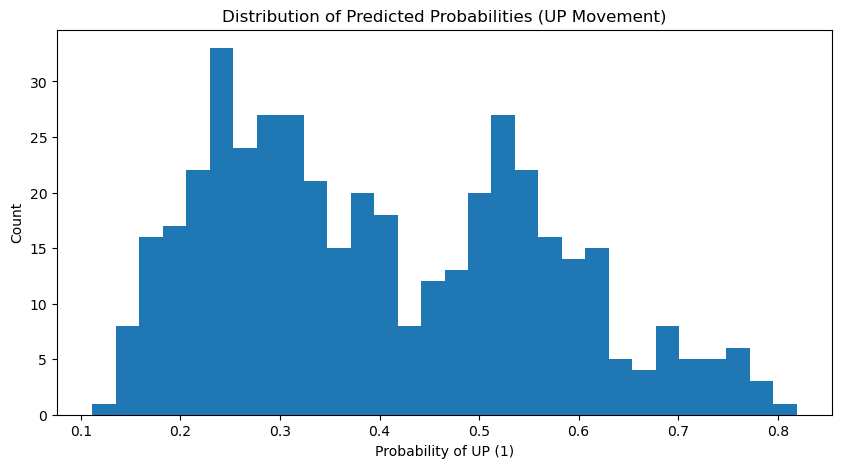

In [46]:
y_prob = model.predict_proba(X_test)[:,1]

plt.figure(figsize=(10,5))
plt.hist(y_prob, bins=30)
plt.title("Distribution of Predicted Probabilities (UP Movement)")
plt.xlabel("Probability of UP (1)")
plt.ylabel("Count")
plt.show()


In [48]:
import numpy as np

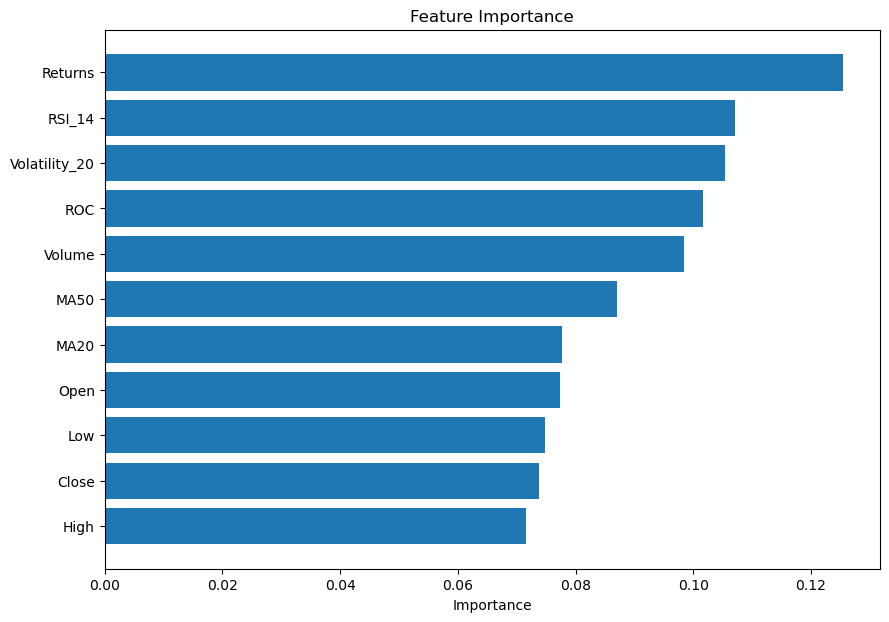

In [49]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.barh([X_train.columns[i] for i in indices], importances[indices])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()


In [50]:
df_test = X_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred
df_test['Pred_Prob'] = model.predict_proba(X_test)[:,1]

In [52]:
test_returns = df['Returns'].iloc[len(X_train):]


In [53]:
df_test['Strategy_Returns'] = df_test['Predicted'] * test_returns


In [54]:
df_test['Cumulative_Strategy'] = (1 + df_test['Strategy_Returns']).cumprod()
df_test['Cumulative_Market'] = (1 + test_returns).cumprod()

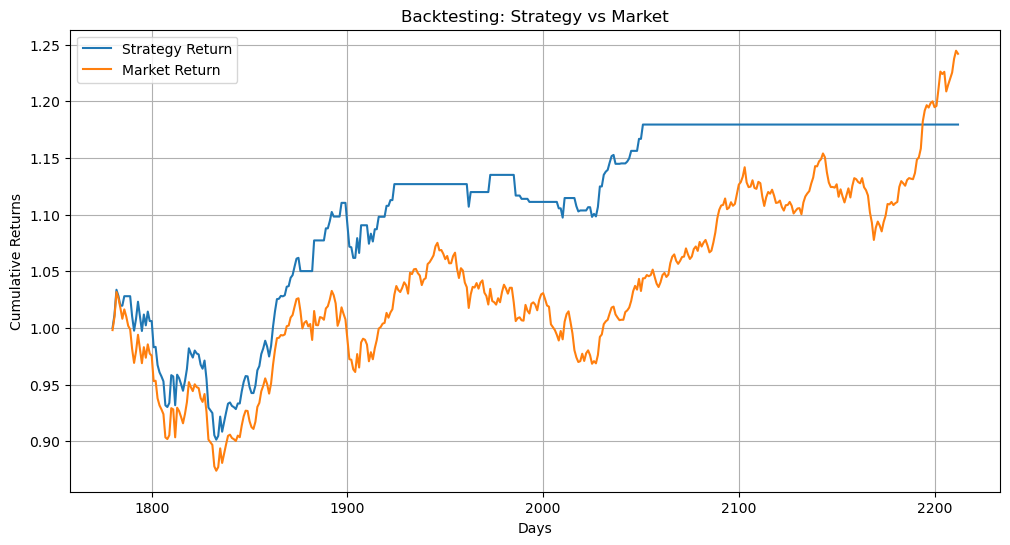

In [55]:
plt.figure(figsize=(12,6))
plt.plot(df_test['Cumulative_Strategy'], label='Strategy Return')
plt.plot(df_test['Cumulative_Market'], label='Market Return')
plt.title("Backtesting: Strategy vs Market")
plt.xlabel("Days")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()


In [57]:
df_test[['Cumulative_Strategy', 'Cumulative_Market']].tail(1)


,Cumulative_Strategy,Cumulative_Market
2212,1.179472,1.241918
